# Task 1 - Compare various clustering algorithms
Dataset: worldcities.csv

Task:
- Try other clustering algorithms implemented in scikit learn: [link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). Compare the results with those obtained using K-means and Hierarchical clustering from the lab session. 

In [42]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
import matplotlib.pyplot as plt

# Load the dataset
worldcities_df = pd.read_csv('worldcities.csv')
X = worldcities_df[['lat', 'lng']]

In [43]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
sampled_X = X.sample(n=5000, random_state=0)
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(sampled_X)

In [45]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

In [46]:
mean_shift = MeanShift(bandwidth=0.05)
mean_shift_labels = mean_shift.fit_predict(X)

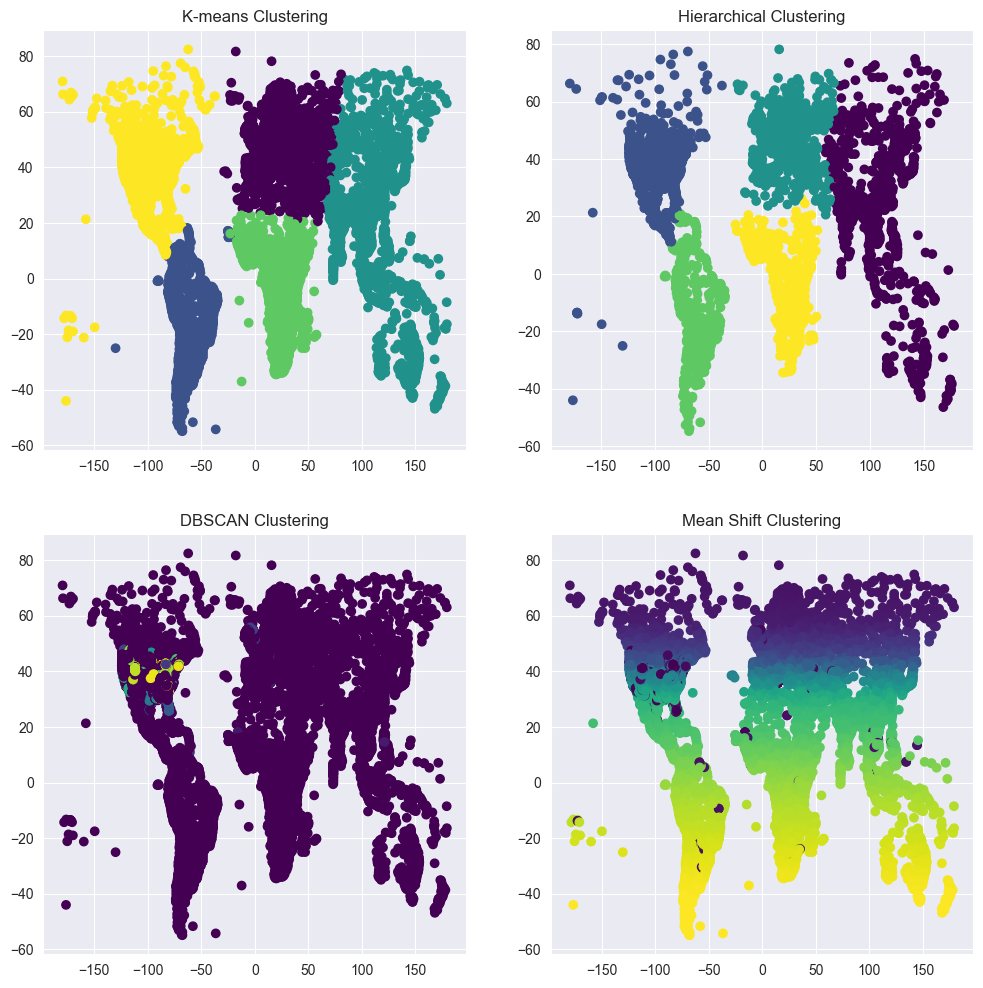

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# K-means plot
ax[0, 0].scatter(X['lng'], X['lat'], c=kmeans_labels, cmap='viridis')
ax[0, 0].set_title('K-means Clustering')

# Hierarchical plot (on the sampled data)
ax[0, 1].scatter(sampled_X['lng'], sampled_X['lat'], c=hierarchical_labels, cmap='viridis')
ax[0, 1].set_title('Hierarchical Clustering')

# DBSCAN plot
ax[1, 0].scatter(X['lng'], X['lat'], c=dbscan_labels, cmap='viridis')
ax[1, 0].set_title('DBSCAN Clustering')

# Mean Shift plot
ax[1, 1].scatter(X['lng'], X['lat'], c=mean_shift_labels, cmap='viridis')
ax[1, 1].set_title('Mean Shift Clustering')

plt.show()


# Task 2 - Clustering & dimensionality reduction
Dataset: vehicle.txt

Task:
- Find the best two features using various feature selection techniques, and then perform clustering. Visualize the results.  
- Apply different dimensionality reduction techniques such as PCA, and then perform clustering. Visualize the results. 
- Compare the visualization quality and insights gained with and without dimensionality reduction. Which technique produces better clusters? Which visualization is more useful?

/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


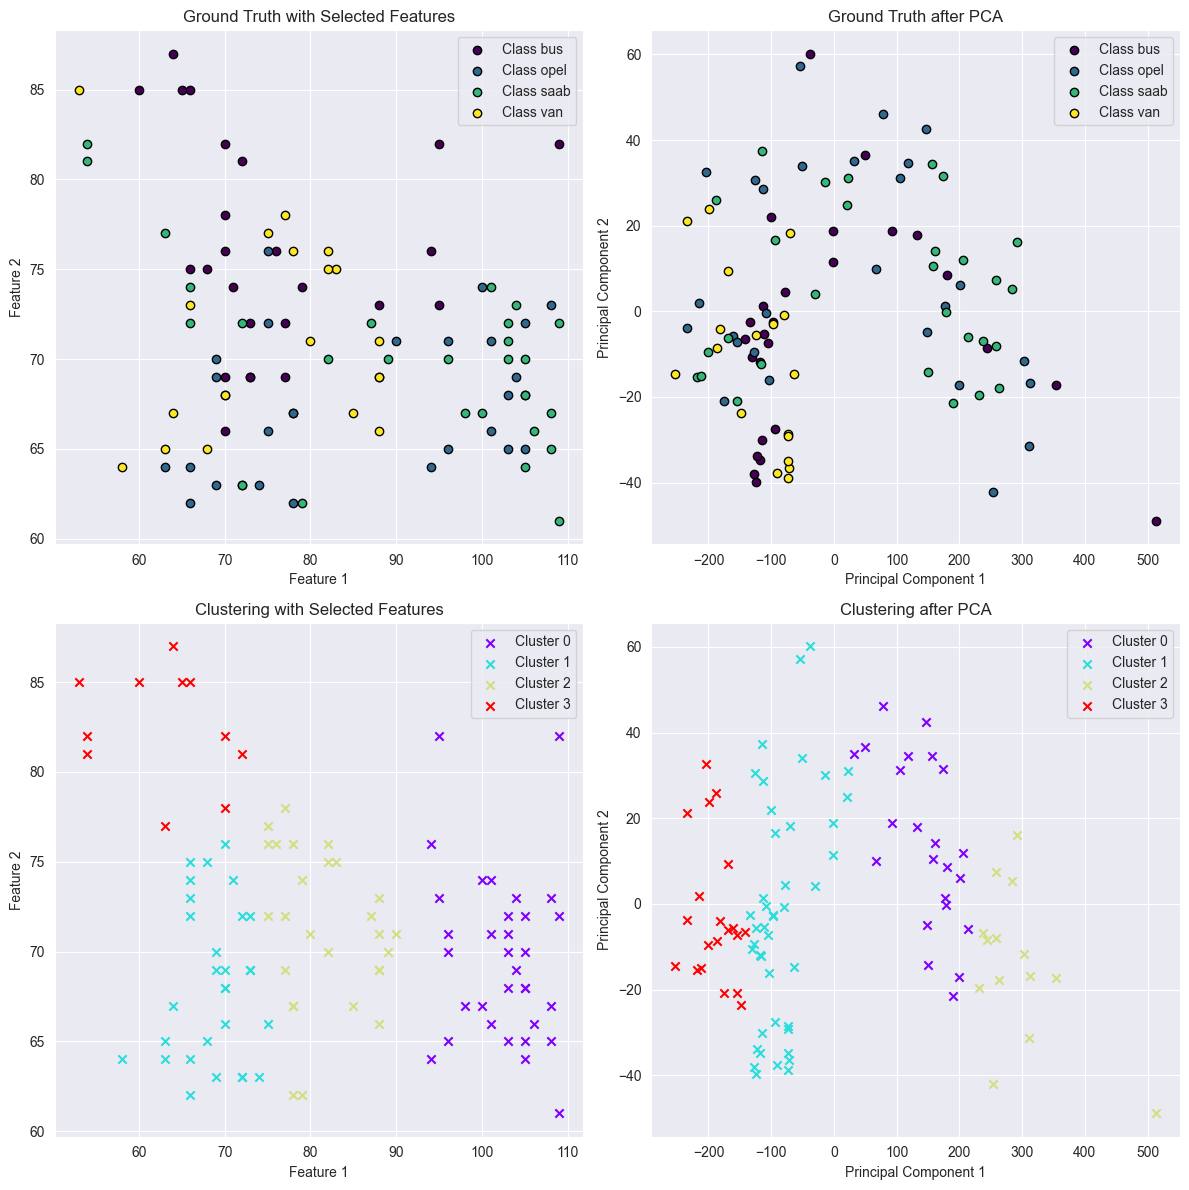

In [48]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and preprocess the dataset
vehicle_df = pd.read_csv('vehicle.txt', delimiter=',')  # Using comma as delimiter
vehicle_df = vehicle_df.sample(100)
X = vehicle_df.drop('Class', axis=1)  # Assuming 'class' is the target column
y = vehicle_df['Class']  # The target column

# Step 2: Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Step 3: Clustering with selected features
kmeans_selected = KMeans(n_clusters=4)
clusters_selected = kmeans_selected.fit_predict(X_new)

# Step 4: Dimensionality Reduction (PCA) and Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=4)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Step 5: Visualization
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Unique classes and clusters for color mapping
unique_classes = np.unique(y)
class_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))
cluster_colors = plt.cm.rainbow(np.linspace(0, 1, 4))

# Ground Truth with Selected Features
for i, cls in enumerate(unique_classes):
    ax[0, 0].scatter(X_new[y == cls, 0], X_new[y == cls, 1], color=class_colors[i], label=f'Class {cls}', marker='o', edgecolor='k')
ax[0, 0].set_title('Ground Truth with Selected Features')
ax[0, 0].set_xlabel('Feature 1')
ax[0, 0].set_ylabel('Feature 2')
ax[0, 0].legend()

# Ground Truth after PCA
for i, cls in enumerate(unique_classes):
    ax[0, 1].scatter(X_pca[y == cls, 0], X_pca[y == cls, 1], color=class_colors[i], label=f'Class {cls}', marker='o', edgecolor='k')
ax[0, 1].set_title('Ground Truth after PCA')
ax[0, 1].set_xlabel('Principal Component 1')
ax[0, 1].set_ylabel('Principal Component 2')
ax[0, 1].legend()

# Clustering with Selected Features
for i in range(4):
    ax[1, 0].scatter(X_new[clusters_selected == i, 0], X_new[clusters_selected == i, 1], color=cluster_colors[i], label=f'Cluster {i}', marker='x')
ax[1, 0].set_title('Clustering with Selected Features')
ax[1, 0].set_xlabel('Feature 1')
ax[1, 0].set_ylabel('Feature 2')
ax[1, 0].legend()

# Clustering after PCA
for i in range(4):
    ax[1, 1].scatter(X_pca[clusters_pca == i, 0], X_pca[clusters_pca == i, 1], color=cluster_colors[i], label=f'Cluster {i}', marker='x')
ax[1, 1].set_title('Clustering after PCA')
ax[1, 1].set_xlabel('Principal Component 1')
ax[1, 1].set_ylabel('Principal Component 2')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

# Task 3 - Ensemble Learning with Different Base Learners

Dataset: vehicle.txt

Task: 

- Create ensemble models using different combinations of base learners. Select the best combination using cross-validation. Compare their performance in terms of a suitable metric.


In [49]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load and preprocess the dataset
# Replace 'vehicle.txt' with the correct path or URL to your dataset
vehicle_df = pd.read_csv('vehicle.txt', delimiter=',')
X = vehicle_df.drop('Class', axis=1)  # Assuming 'class' is the target column
y = vehicle_df['Class']  # The target column

# Step 2: Create ensemble models with different base learners
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging_DT": BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    "Bagging_SVM": BaggingClassifier(base_estimator=SVC()),
    "Bagging_KNN": BaggingClassifier(base_estimator=KNeighborsClassifier())
}

# Step 3: Evaluate each model using cross-validation
scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores[model_name] = cv_scores.mean()

# Step 4: Print the performance
for model_name, score in scores.items():
    print(f"{model_name}: Average Accuracy = {score:.4f}")


/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

RandomForest: Average Accuracy = 0.7494
GradientBoosting: Average Accuracy = 0.7683
Bagging_DT: Average Accuracy = 0.7293
Bagging_SVM: Average Accuracy = 0.5048
Bagging_KNN: Average Accuracy = 0.6549


/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
